<a href="https://colab.research.google.com/github/Ananya9304/CODSOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
test_data = pd.read_csv("/content/fraudTest.csv")

In [4]:
train_data = pd.read_csv("/content/fraudTrain.csv")

In [5]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [6]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [7]:
whole=pd.concat([train_data,test_data])

In [8]:
whole.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [9]:
train_data=train_data.drop(columns='Unnamed: 0')
test_data=test_data.drop(columns='Unnamed: 0')

In [10]:
encoder=LabelEncoder()
train_data['merchant']=encoder.fit_transform(train_data['merchant'])
train_data['category']=encoder.fit_transform(train_data['category'])
train_data['street']=encoder.fit_transform(train_data['street'])
train_data['job']=encoder.fit_transform(train_data['job'])
train_data['trans_num']=encoder.fit_transform(train_data['trans_num'])
train_data['first']=encoder.fit_transform(train_data['first'])
train_data['city']=encoder.fit_transform(train_data['city'])
train_data['state']=encoder.fit_transform(train_data['state'])
train_data['last']=encoder.fit_transform(train_data['last'])
train_data['gender']=encoder.fit_transform(train_data['gender'])
train_data['trans_date_trans_time']=encoder.fit_transform(train_data['trans_date_trans_time'])
train_data['dob']=encoder.fit_transform(train_data['dob'])

In [11]:
test_data['merchant']=encoder.fit_transform(test_data['merchant'])
test_data['category']=encoder.fit_transform(test_data['category'])
test_data['street']=encoder.fit_transform(test_data['street'])
test_data['job']=encoder.fit_transform(test_data['job'])
test_data['trans_num']=encoder.fit_transform(test_data['trans_num'])
test_data['first']=encoder.fit_transform(test_data['first'])
test_data['city']=encoder.fit_transform(test_data['city'])
test_data['state']=encoder.fit_transform(test_data['state'])
test_data['last']=encoder.fit_transform(test_data['last'])
test_data['gender']=encoder.fit_transform(test_data['gender'])
test_data['trans_date_trans_time']=encoder.fit_transform(test_data['trans_date_trans_time'])
test_data['dob']=encoder.fit_transform(test_data['dob'])

In [12]:
train_data.head()
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2291163933867244,319,10,2.86,149,113,1,338,157,...,33.9659,-80.9355,333497,275,369,6177,1.371817e+09,33.986391,-81.200714,0.0
1,1,3573030041201292,591,10,29.84,161,453,0,351,16,...,40.3207,-110.4360,302,391,750,6819,1.371817e+09,39.450498,-109.960431,0.0
2,2,3598215285024754,611,5,41.28,24,247,0,852,61,...,40.6729,-73.5365,34496,259,411,27326,1.371817e+09,40.495810,-74.196111,0.0
3,3,3591919803438423,222,9,60.05,42,453,1,317,754,...,28.5697,-80.8191,54767,406,708,4508,1.371817e+09,28.812398,-80.883061,0.0
4,4,3526826139003047,292,13,3.19,245,259,1,542,246,...,44.2529,-85.0170,1126,196,175,11967,1.371817e+09,44.959148,-85.884734,0.0


In [21]:
from sklearn.impute import SimpleImputer
# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # You can choose a different strategy if needed

# Fit and transform the imputer on the training data
x_train = train_data.drop(columns='is_fraud')
x_train = imputer.fit_transform(x_train)

# Transform the test data using the fitted imputer
x_test = test_data.drop(columns='is_fraud')
x_test = imputer.transform(x_test)

y_train = train_data['is_fraud']
y_test = test_data['is_fraud']

# Create a new imputer for y with strategy constant and fill value 0, you can adjust the fill_value if required
imputer_y = SimpleImputer(strategy='constant', fill_value=0)
y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = imputer_y.transform(y_test.values.reshape(-1, 1))

# Reshape y_train and y_test back to 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()


In [22]:
modelLR=LogisticRegression(max_iter=1000, random_state=42)

In [23]:
modelLR.fit(x_train,y_train)
print(modelLR)

LogisticRegression(max_iter=1000, random_state=42)


In [24]:
predictionsLR=modelLR.predict(x_test)

In [25]:
accuracyLR=accuracy_score(y_test,predictionsLR)

In [26]:
accuracyLR

0.9959152193784278

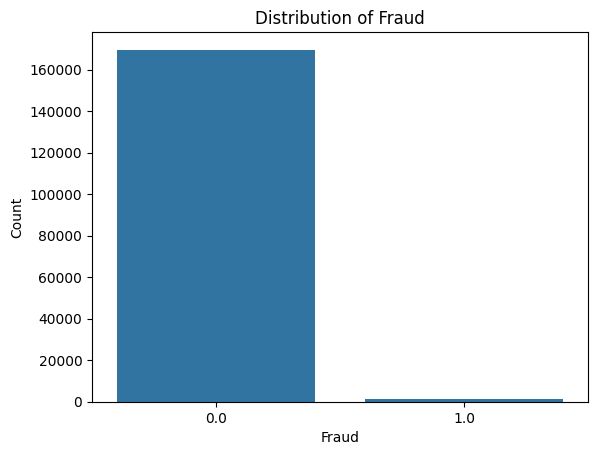

In [27]:
fraud_counts=whole['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

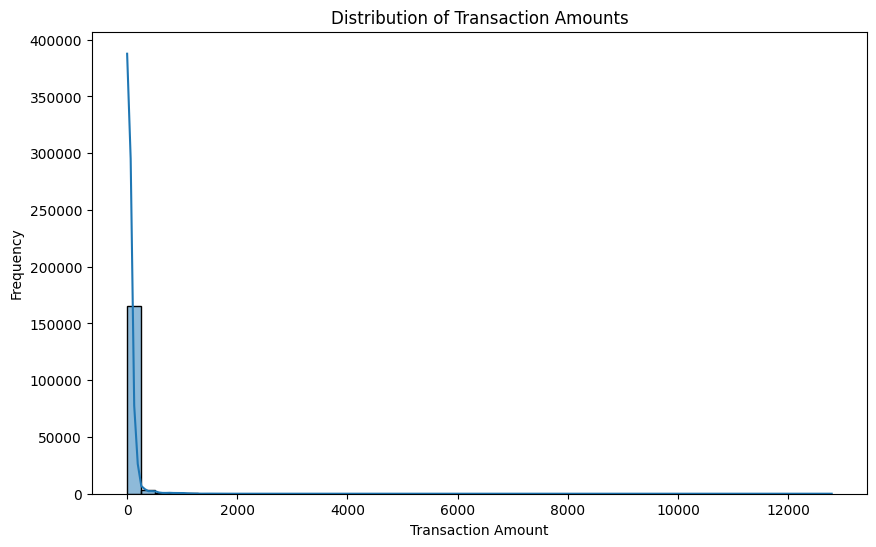

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(whole['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()